# Kwanza Tukule Data Analyst Assessment
Author : Keziah Gicheha 

Date : 31/01/2025

Tools used: Python(Pandas, Numpy, Matplotlib, Seaborn)

## Introduction 

This notebook presents an analysis of anonymized sales data provided by Kwanza Tukule. The goal of this assessment is to evaluate data cleaning, preparation, and analytical skills by addressing key tasks, including:

* Identifying and resolving data quality issues (e.g., missing values, duplicates, inconsistent data types).
* Performing feature engineering to create new useful columns.
* Conducting exploratory data analysis (EDA) to uncover trends and insights.
* Providing actionable recommendations based on data findings.




### Section 1: Data Cleaning and Preparation

This section outlines the steps taken to clean and prepare the dataset for analysis. The dataset represents anonymized sales data from Kwanza Tukule.


In [100]:
#import necessary libraries fot the data cleaning, visualization and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
data = pd.read_csv('Data/kwanza_tukule.csv')

#check the first 5 rows of the data
data.head(5)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"


### 1.1 Data Quality Assessment

In [101]:
#Inspect the dataset
print(data.info())

print(data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333405 non-null  object
 1   ANONYMIZED CATEGORY  333405 non-null  object
 2   ANONYMIZED PRODUCT   333405 non-null  object
 3   ANONYMIZED BUSINESS  333405 non-null  object
 4   ANONYMIZED LOCATION  333405 non-null  object
 5   QUANTITY             333405 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB
None
            QUANTITY
count  333405.000000
mean        2.321186
std         3.790614
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       359.000000


#### Check for Missing Values

In [102]:
#Check for missing values
print("Missing values per column:\n", data.isnull().sum())
print("Missing values per column:\n", data.isnull().sum()* 100 / len(data))

Missing values per column:
 DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64
Missing values per column:
 DATE                   0.000000
ANONYMIZED CATEGORY    0.000000
ANONYMIZED PRODUCT     0.000000
ANONYMIZED BUSINESS    0.000000
ANONYMIZED LOCATION    0.000000
QUANTITY               0.000000
UNIT PRICE             0.002399
dtype: float64


From the output above, the column named "UNIT PRICE" has missing values. 
Because it is a small percentage of 0.002% the best approach to handle this would be to drop those 8 rows as it will have no sifnificant impact to the analysis.

This also ensures that I  will not introduce any artificial bias - important in ensuring ethics in Data Science.

##### Drop Missing Values

In [103]:
# Drop the missing values
data = data.dropna(subset="UNIT PRICE")



In [104]:
#Check for missing values
print("Missing values per column:\n", data.isnull().sum())


Missing values per column:
 DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
dtype: int64


There are no missing values in the dataset. 

#### Check for Duplicates

In [105]:
#check for duplicates
print("Number of duplicates: ", data.duplicated().sum())

Number of duplicates:  3524


There are 3524 rows that are duplicated rows, to ensure accurate analysis they need to be removed

##### Drop Duplicates

In [106]:
#drop duplicates
data = data.drop_duplicates()
print("Number of duplicates: ", data.duplicated().sum())

Number of duplicates:  0


The duplicated values have been dropped/deleted from the dataset.

In [107]:
#check data types
print("Data types:\n", data.dtypes)

Data types:
 DATE                   object
ANONYMIZED CATEGORY    object
ANONYMIZED PRODUCT     object
ANONYMIZED BUSINESS    object
ANONYMIZED LOCATION    object
QUANTITY                int64
UNIT PRICE             object
dtype: object


#### Check for Unique Values

In [108]:
#check for unique values
print("Unique values:\n", data.nunique())


Unique values:
 DATE                   96702
ANONYMIZED CATEGORY       46
ANONYMIZED PRODUCT       817
ANONYMIZED BUSINESS     4800
ANONYMIZED LOCATION       53
QUANTITY                  79
UNIT PRICE              1050
dtype: int64


From the output above, the dataset has unique values from each column. This will be explored more in the analysis section.


#### Check the Datatypes

In [109]:
#check the datatypes
print("Data types:\n", data.dtypes)

Data types:
 DATE                   object
ANONYMIZED CATEGORY    object
ANONYMIZED PRODUCT     object
ANONYMIZED BUSINESS    object
ANONYMIZED LOCATION    object
QUANTITY                int64
UNIT PRICE             object
dtype: object


from the datatype above, the column date needs to be changed from object to a datetype datatype while unit price needs to be converted to integer or float depending on how the prices are looking

In [110]:
#convert UNIT PRICE to integer
#first remove commas 
data['UNIT PRICE'] = data['UNIT PRICE'].str.replace(',', '', )
#convert to integer
data['UNIT PRICE'] = data['UNIT PRICE'].astype('int64')
# Display the updated dataframe
print(data.head(2))



                       DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0  August 18, 2024, 9:32 PM        Category-106       Product-21f4   
1  August 18, 2024, 9:32 PM        Category-120       Product-4156   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE  
0       Business-de42       Location-1ba8         1         850  
1       Business-de42       Location-1ba8         2        1910  


#### 1.2 Feature Engineering

#### Convert DATE Column to Datetime

In [111]:
#convert the date value to a datetime formart
data['DATE'] = pd.to_datetime(data['DATE'])
# Display the updated dataframe
print(data.head(2))


<ipython-input-111-02c5d6767e47>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DATE'] = pd.to_datetime(data['DATE'])


                 DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0 2024-08-18 21:32:00        Category-106       Product-21f4   
1 2024-08-18 21:32:00        Category-120       Product-4156   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE  
0       Business-de42       Location-1ba8         1         850  
1       Business-de42       Location-1ba8         2        1910  


#### Create Month-Year Column

In [112]:

# Create "Month-Year" column
data['Month-Year'] = data['DATE'].dt.strftime('%B %Y')

# Display the updated dataframe
print(data.head(3))

                 DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0 2024-08-18 21:32:00        Category-106       Product-21f4   
1 2024-08-18 21:32:00        Category-120       Product-4156   
2 2024-08-18 21:32:00        Category-121       Product-49bd   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE   Month-Year  
0       Business-de42       Location-1ba8         1         850  August 2024  
1       Business-de42       Location-1ba8         2        1910  August 2024  
2       Business-de42       Location-1ba8         1        3670  August 2024  


#### Lowecase the Column Names and use underscore instead of spacing names

In [113]:
#lowecase the column names
data.columns = data.columns.str.lower().str.replace(' ', '_')
print(data.columns)

Index(['date', 'anonymized_category', 'anonymized_product',
       'anonymized_business', 'anonymized_location', 'quantity', 'unit_price',
       'month-year'],
      dtype='object')


For readablity and ease of use I have lowercased the column names and used underscores instead of spacing.

In [114]:
data.dtypes

date                   datetime64[ns]
anonymized_category            object
anonymized_product             object
anonymized_business            object
anonymized_location            object
quantity                        int64
unit_price                      int64
month-year                     object
dtype: object

In [118]:
data.describe()

,date,quantity,unit_price
count,329873,329873.000000,329873.000000
mean,2024-07-18 11:47:54.002236672,2.321469,2319.016579
min,2024-01-01 05:54:00,0.000000,0.000000
25%,2024-04-30 16:34:00,1.000000,1420.000000
50%,2024-07-29 18:40:00,1.000000,1840.000000
75%,2024-10-14 21:32:00,2.000000,2750.000000
max,2024-12-31 18:24:00,359.000000,16136.000000
std,NaN,3.767697,1582.578700


#### Creating a Copy of the Cleaned DataFrame


In [116]:
#create a copy of the cleaned dataframe for further analysis
kt_clean_df = data.copy()
kt_clean_df.head(2)

,date,anonymized_category,anonymized_product,anonymized_business,anonymized_location,quantity,unit_price,month-year
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850,August 2024
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910,August 2024


## SECTION 2 : EXPLORATORY DATA ANALYSIS (EDA)

2.1 Calculate Total Quantity and Value


In [130]:
# Calculate total Quantity and Value grouped by Anonymized Category
category_grouped = kt_clean_df.groupby('anonymized_category').agg({'quantity': 'sum', 'unit_price': 'sum'}).reset_index()
category_grouped['total_value'] = category_grouped['quantity'] * category_grouped['unit_price']

# Order by highest total_value
category_grouped = category_grouped.sort_values(by='total_value', ascending=False)

# Display the ordered grouped data
print(category_grouped)

   anonymized_category  quantity  unit_price     total_value
25         Category-75    151330   181554632  27474662460560
18        Category-120    169715   115506421  19603172240015
26         Category-76     71719   198499343  14236174380617
17        Category-119     68332    48102774   3286958752968
0         Category-100     76824    30783426   2364905919024
27         Category-77     28455    36277127   1032265648785
38         Category-91     20853    35729823    745073999019
34         Category-85     22997    20550056    472589637832
1         Category-101     19564    12225757    239184709948
40         Category-94     23668     7954876    188276005168
19        Category-121     14669    12183700    178722695300
28         Category-78      9766     6562538     64089746108
33         Category-84     11933     5045168     60203989744
39         Category-92      6953     7512585     52235003505
9         Category-110     10529     4215429     44384251941
5         Category-106  

Grouped by Anonymized Business

In [119]:
# Calculate total Quantity and Value grouped by Anonymized Business
business_grouped = kt_clean_df.groupby('anonymized_business').agg({'quantity': 'sum', 'unit_price': 'sum'}).reset_index()
business_grouped['total_value'] = business_grouped['quantity'] * business_grouped['unit_price']

# Display the grouped data
print(business_grouped)

     anonymized_business  quantity  unit_price  total_value
0          Business-0000         8       10445        83560
1          Business-0005         1        2645         2645
2          Business-0029        26       18385       478010
3          Business-003d        98       73251      7178598
4          Business-0072       127      194501     24701627
...                  ...       ...         ...          ...
4795       Business-ffa9         3        6740        20220
4796       Business-ffae         6        9890        59340
4797       Business-ffb1       266      259006     68895596
4798       Business-ffd2        37       48217      1784029
4799       Business-ffff       110      108835     11971850

[4800 rows x 4 columns]


 Visualizations of the Data

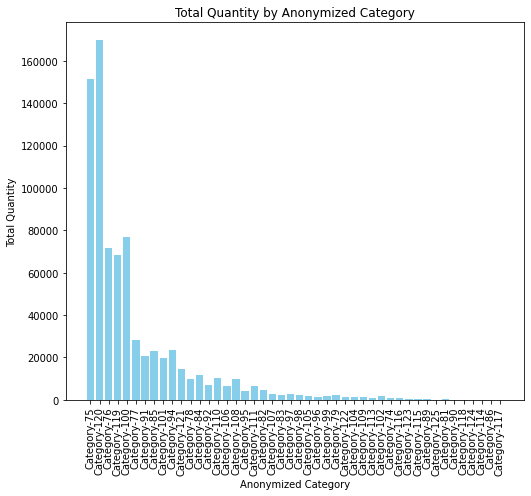

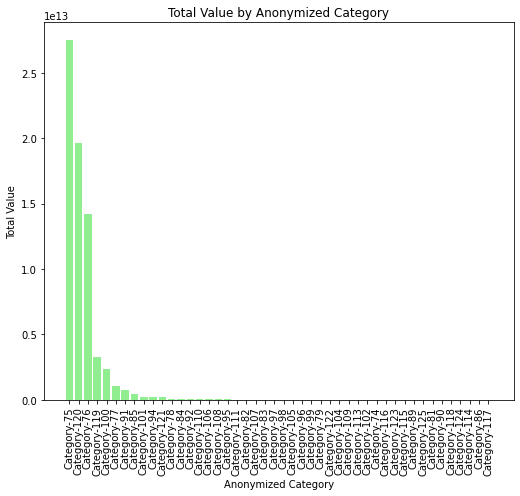

In [136]:
# Plot total Quantity and Value grouped by Anonymized Category
plt.figure(figsize=(14, 7))

# Total Quantity by Anonymized Category
plt.subplot(1, 2, 1)
plt.bar(category_grouped['anonymized_category'], category_grouped['quantity'], color='skyblue')
plt.xlabel('Anonymized Category')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Anonymized Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



# Total Value by Anonymized Category

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
plt.bar(category_grouped['anonymized_category'], category_grouped['total_value'], color='lightgreen')
plt.xlabel('Anonymized Category')
plt.ylabel('Total Value')
plt.title('Total Value by Anonymized Category')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Visualizations for Anonymized Business


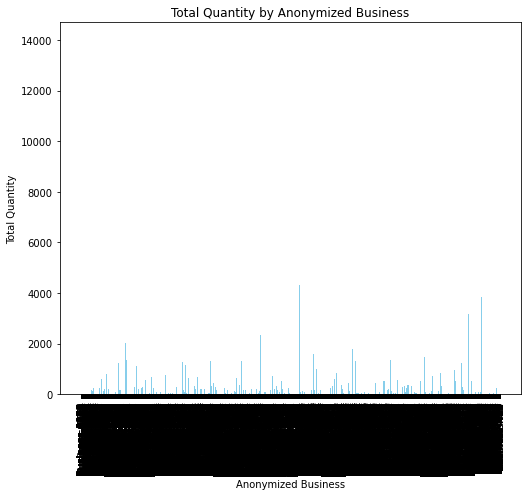

In [138]:
# Plot total Quantity and Value grouped by Anonymized Business
plt.figure(figsize=(14, 7))

# Total Quantity by Anonymized Business
plt.subplot(1, 2, 1)
plt.bar(business_grouped['anonymized_business'], business_grouped['quantity'], color='skyblue')
plt.xlabel('Anonymized Business')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Anonymized Business')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


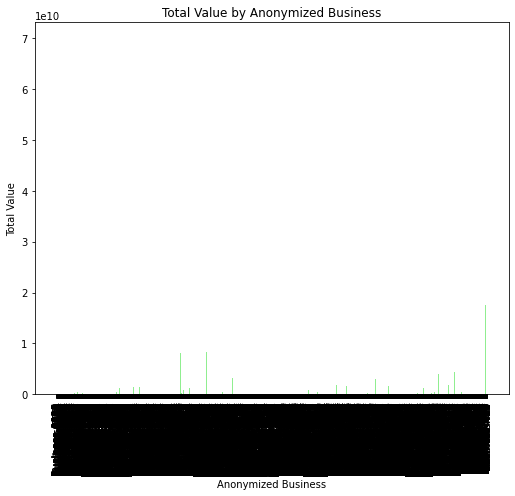

In [139]:

plt.figure(figsize=(14, 7)) 
# Total Value by Anonymized Business
plt.subplot(1, 2, 2)
plt.bar(business_grouped['anonymized_business'], business_grouped['total_value'], color='lightgreen')
plt.xlabel('Anonymized Business')
plt.ylabel('Total Value')
plt.title('Total Value by Anonymized Business')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### 2.2 Trends Over Time: Analyze sales trends (Value and Quantity) by Month-Year.

Create a time series plot to show seasonal patterns or changes in sales performance.

### 2.3 Performance Analysis:

Identify the top 5 most frequently purchased products (based on Quantity).



Identify the top 5 most valuable products (based on Value).

### 3. Advanced Analysis

3.1 Customer Segmentation

    Perform a segmentation analysis of businesses (Anonymized Business) based on their purchasing behavior:

    Total Quantity purchased
    Total Value contributed
    Frequency of transactions

Classify businesses into 3 groups (e.g., High Value, Medium Value, Low Value) and provide recommendations for engagement with each group.

3.2 Forecasting: Using the provided data, forecast the total sales (Value) for the next 3 months. Use an appropriate time-series forecasting method (e.g., ARIMA, moving average, or exponential smoothing).

3.3 Anomaly Detection:Identify any unusual spikes or drops in sales performance (Quantity or Value) and explain possible reasons based on the data

3.4 Correlation Analysis:Examine relationships between Quantity and Value. Provide insights into which factors drive sales performance.

### Section 4: Strategic Insights and Recommendations (20 points)

    

1. Product Strategy: Based on your analysis, recommend one product category to prioritize for marketing campaigns. Justify your choice using the data.


2. Customer Retention: Identify businesses that have reduced their purchase frequency over time. Suggest strategies to re-engage these customers.



   3. Operational Efficiency:Suggest improvements to inventory management or supply chain processes based on trends in product performance and seasonal demand.

### Section 5: Dashboard and Reporting (20 points)

Create a dashboard summarizing key insights, including:

    Total Quantity and Value by Anonymized Category.
    Top-performing products and businesses.
    A time-series chart of sales trends.
    A segmentation summary of customer groups.

Use tools such as Power BI, Tableau, or a Python library (e.g., Plotly, Dash) to make the dashboard interactive (if possible). Provide a screenshot or link to the dashboard.

    Predictive Analysis: Identify external factors that could influence sales (e.g., economic conditions, competitor actions). Propose a methodology to incorporate such factors into future analyses.
    
    Scalability: If the dataset were 10 times larger, what optimizations would you implement for data storage, processing, and analysis?

In [ ]:
### 